# Plot the flows change for different modes in London

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.dates as mdates
import datetime

/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
# load the data
flows_lsoa = '/Users/zonghe/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Zonghe Ma/processed data/flows_lsoa.shp'
flows_lsoa = gpd.read_file(flows_lsoa, crs={'init': 'epsg:27700'})
inoutter = '/Users/zonghe/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Zonghe Ma/Raw data/London administrative boundaries/lp-consultation-oct-2009-inner-outer-london-shp/lp-consultation-oct-2009-inner-outer-london.shp'
inoutter = gpd.read_file(inoutter, crs={'init': 'epsg:27700'})
flows_lsoa = gpd.sjoin(flows_lsoa, inoutter, how='inner', op='within')
flows_lsoa.drop(columns=['index_right', 'Source', 'Area_Ha', 'Shape_Leng', 'Shape_Area'], inplace=True)
flows_lsoa.rename(columns={'Boundary': 'Inner_Outer'}, inplace=True)

print(flows_lsoa.head())
print(flows_lsoa.columns)
print(len(flows_lsoa['LSOA21CD'].unique()))
print(len(flows_lsoa['date'].unique()))
print(flows_lsoa.describe())

/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/1k/27mkp8bj3ps60c3nmr7rbqzh0000gn/T/ipykernel_9881/2371801539.py:6: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: PROJCS["OSGB36_British_National_Grid",GEOGCS["GCS_ ...
Right CRS: PROJCS["British_National_Grid",GEOGCS["GCS_OSGB_19 ...

  flows_lsoa = gpd.sjoin(flows_lsoa, inoutter, how='inner', op='within')


    LSOA21CD                   LSOA21NM                              GlobalID  \
0  E01002939  Kingston upon Thames 018A  0d79ce01-4344-4518-b08f-1a1818aabd06   
1  E01002939  Kingston upon Thames 018A  0d79ce01-4344-4518-b08f-1a1818aabd06   
2  E01002939  Kingston upon Thames 018A  0d79ce01-4344-4518-b08f-1a1818aabd06   
3  E01002939  Kingston upon Thames 018A  0d79ce01-4344-4518-b08f-1a1818aabd06   
4  E01002939  Kingston upon Thames 018A  0d79ce01-4344-4518-b08f-1a1818aabd06   

       date    bus     car  cycle  walks  stationary  \
0  02/21/22  142.0  3427.0   84.0  445.0        42.0   
1  02/22/22  122.0  3540.0  171.0  660.0        42.0   
2  02/23/22  152.0  3417.0   80.0  653.0        51.0   
3  02/24/22  146.0  3711.0  134.0  759.0        68.0   
4  02/25/22  161.0  3938.0  103.0  699.0        54.0   

                                            geometry   Inner_Outer  
0  POLYGON ((518114.073 165088.707, 518126.068 16...  Outer London  
1  POLYGON ((518114.073 165088.707, 51

In [3]:
# organize the flows data
flows_londonsum = flows_lsoa.groupby('date').aggregate(
    {'bus': 'sum', 'car': 'sum', 'cycle': 'sum', 'walks': 'sum', 'stationary': 'sum'})
flows_londonsum.index = pd.to_datetime(flows_londonsum.index)

flows_inouttersum = flows_lsoa.groupby(['date', 'Inner_Outer']).aggregate(
    {'bus': 'sum', 'car': 'sum', 'cycle': 'sum', 'walks': 'sum', 'stationary': 'sum'}).reset_index()
flows_inner = flows_inouttersum[flows_inouttersum['Inner_Outer'] == 'Inner London'].drop(columns=['Inner_Outer'])
flows_outer = flows_inouttersum[flows_inouttersum['Inner_Outer'] == 'Outer London'].drop(columns=['Inner_Outer'])

flows_inner.set_index('date', inplace=True)
flows_outer.set_index('date', inplace=True)
flows_inner.index = pd.to_datetime(flows_londonsum.index)
flows_outer.index = pd.to_datetime(flows_londonsum.index)

print(flows_londonsum.columns)
print(flows_inner.columns)

Index(['bus', 'car', 'cycle', 'walks', 'stationary'], dtype='object')
Index(['bus', 'car', 'cycle', 'walks', 'stationary'], dtype='object')


/var/folders/1k/27mkp8bj3ps60c3nmr7rbqzh0000gn/T/ipykernel_9881/1574978057.py:8: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.axvspan(start_date, end_date, color='gray', alpha=0.1, edgecolor='none')
/var/folders/1k/27mkp8bj3ps60c3nmr7rbqzh0000gn/T/ipykernel_9881/1574978057.py:9: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.axvspan(strike_start, strike_end, color='maroon', alpha=0.1, edgecolor='none')


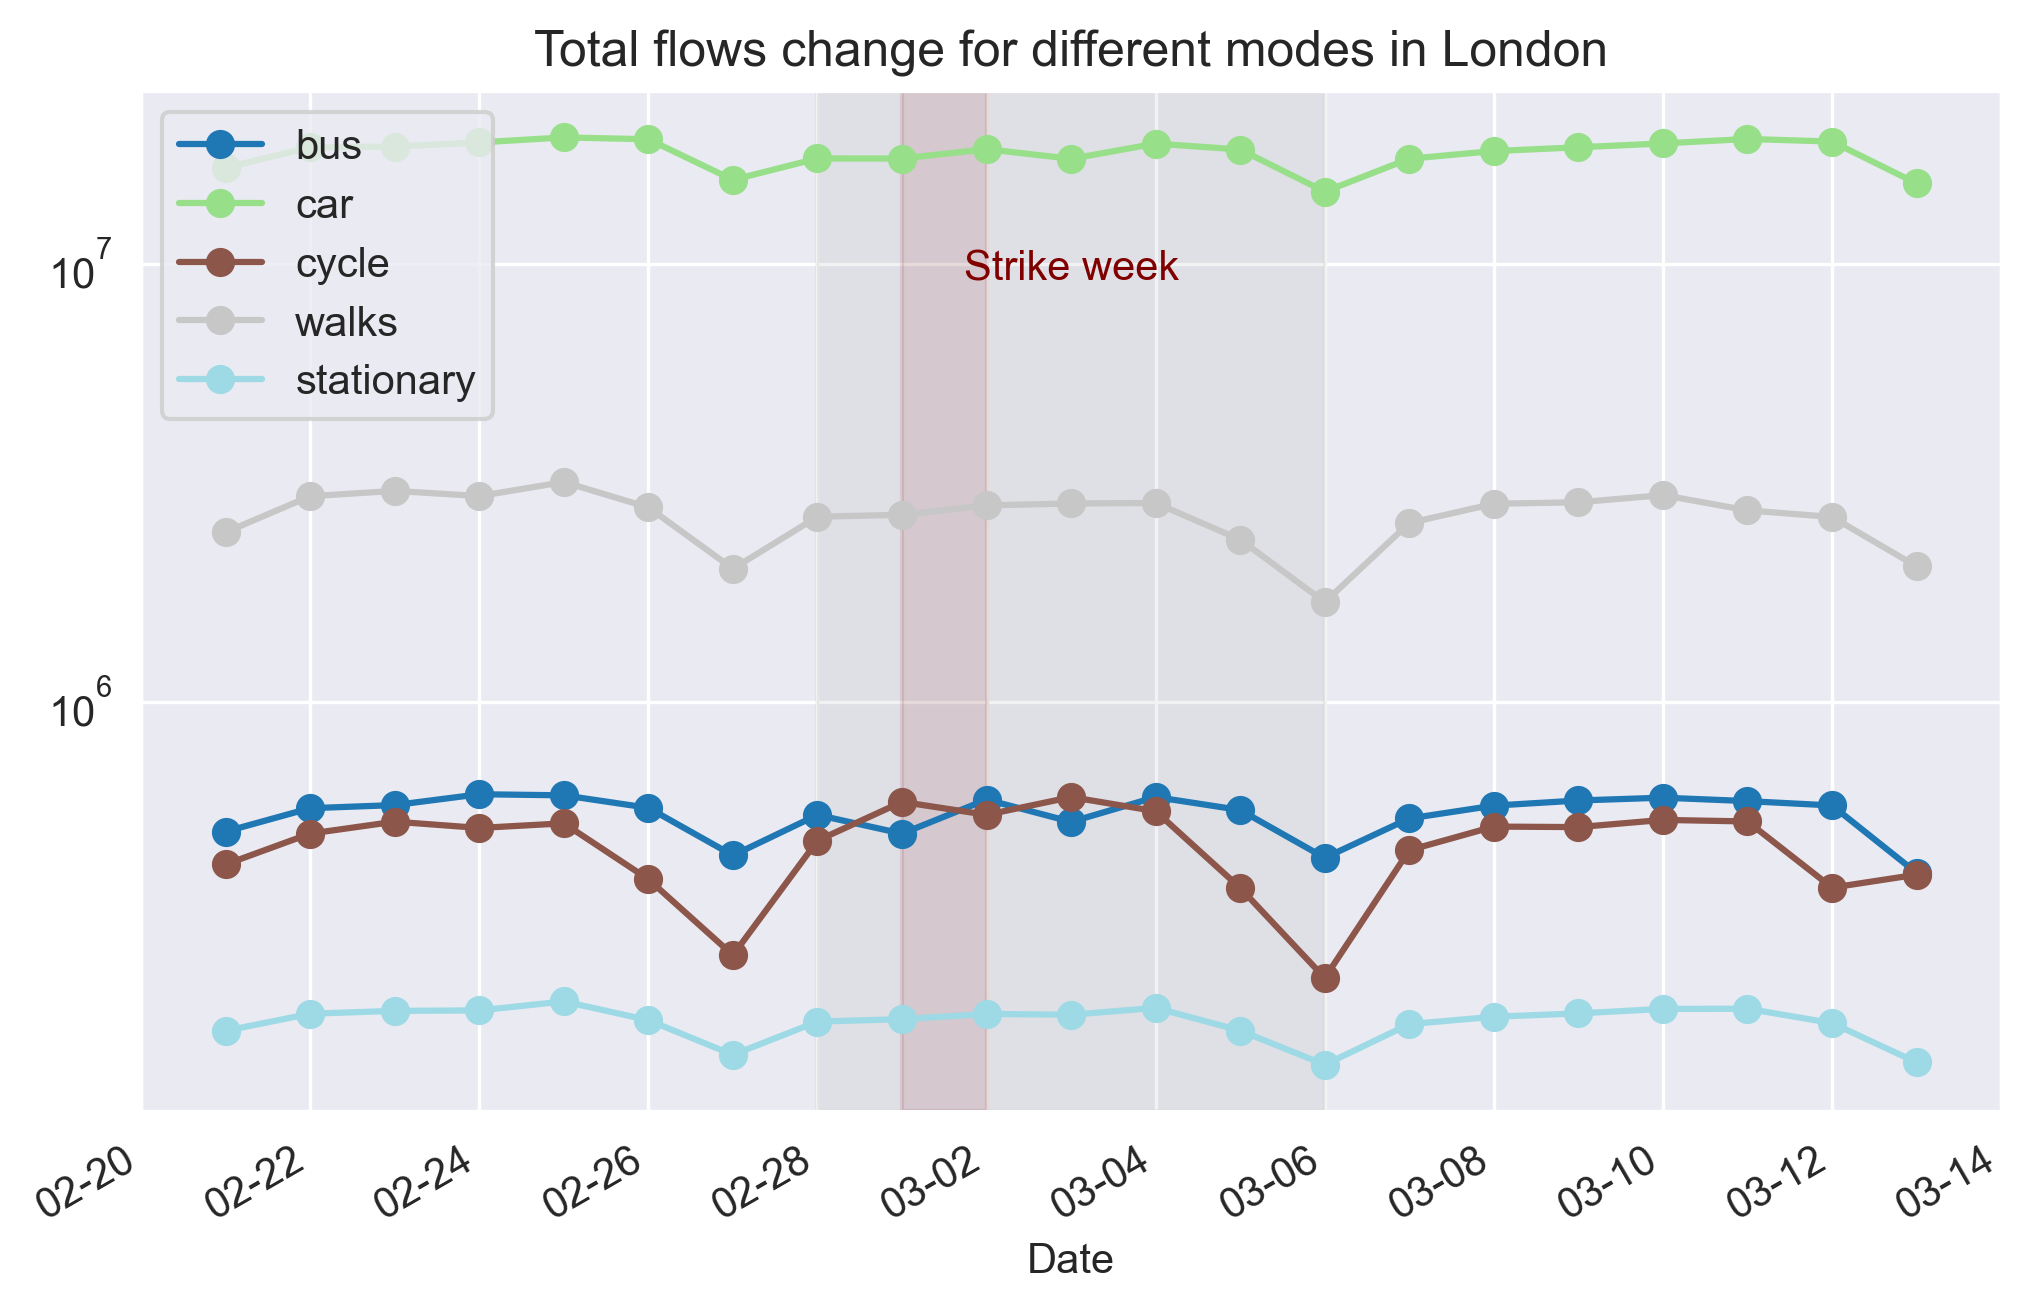

In [4]:
# visualize the total flow data
fig, ax = plt.subplots(figsize=(8, 5), dpi=300)
# Add a shaded region
start_date = datetime.datetime(2022, 2, 28)
end_date = datetime.datetime(2022, 3, 6)
strike_start = datetime.datetime(2022, 3, 1)
strike_end = datetime.datetime(2022, 3, 2)
ax.axvspan(start_date, end_date, color='gray', alpha=0.1, edgecolor='none')
ax.axvspan(strike_start, strike_end, color='maroon', alpha=0.1, edgecolor='none')
# Add text
text_x = start_date + (end_date - start_date) / 2  # Center of the shaded region
ax.set_yscale('log')
ymax_all = flows_londonsum.max().max()
text_y_all = ymax_all / 2  # Middle of the y-axis range in logarithmic scale
ax.text(text_x, text_y_all, 'Strike week', horizontalalignment='center', verticalalignment='center', color='maroon')

ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# Define the colormap
cmap_o = cm.get_cmap('tab20', len(flows_inner.columns))

for i in range(len(flows_londonsum.columns)):
    ax.plot(flows_londonsum.index, flows_londonsum.iloc[:, i], color=cmap_o(i), label=flows_londonsum.columns[i],
            linewidth=1.5, marker='o')

ax.set_xlabel('Date')
ax.legend(loc='upper left')

# rotate the x-axis ticks
fig.autofmt_xdate()
plt.title('Total flows change for different modes in London')
fig.savefig(
    '/Users/zonghe/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Zonghe Ma/Outout/pics/Total flows change for different modes in London',
    dpi=300, bbox_inches='tight')
plt.show()

/var/folders/1k/27mkp8bj3ps60c3nmr7rbqzh0000gn/T/ipykernel_9881/488414500.py:9: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax1.axvspan(start_date, end_date, color='gray', alpha=0.1, edgecolor='none')
/var/folders/1k/27mkp8bj3ps60c3nmr7rbqzh0000gn/T/ipykernel_9881/488414500.py:10: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax1.axvspan(strike_start, strike_end, color='maroon', alpha=0.1, edgecolor='none')


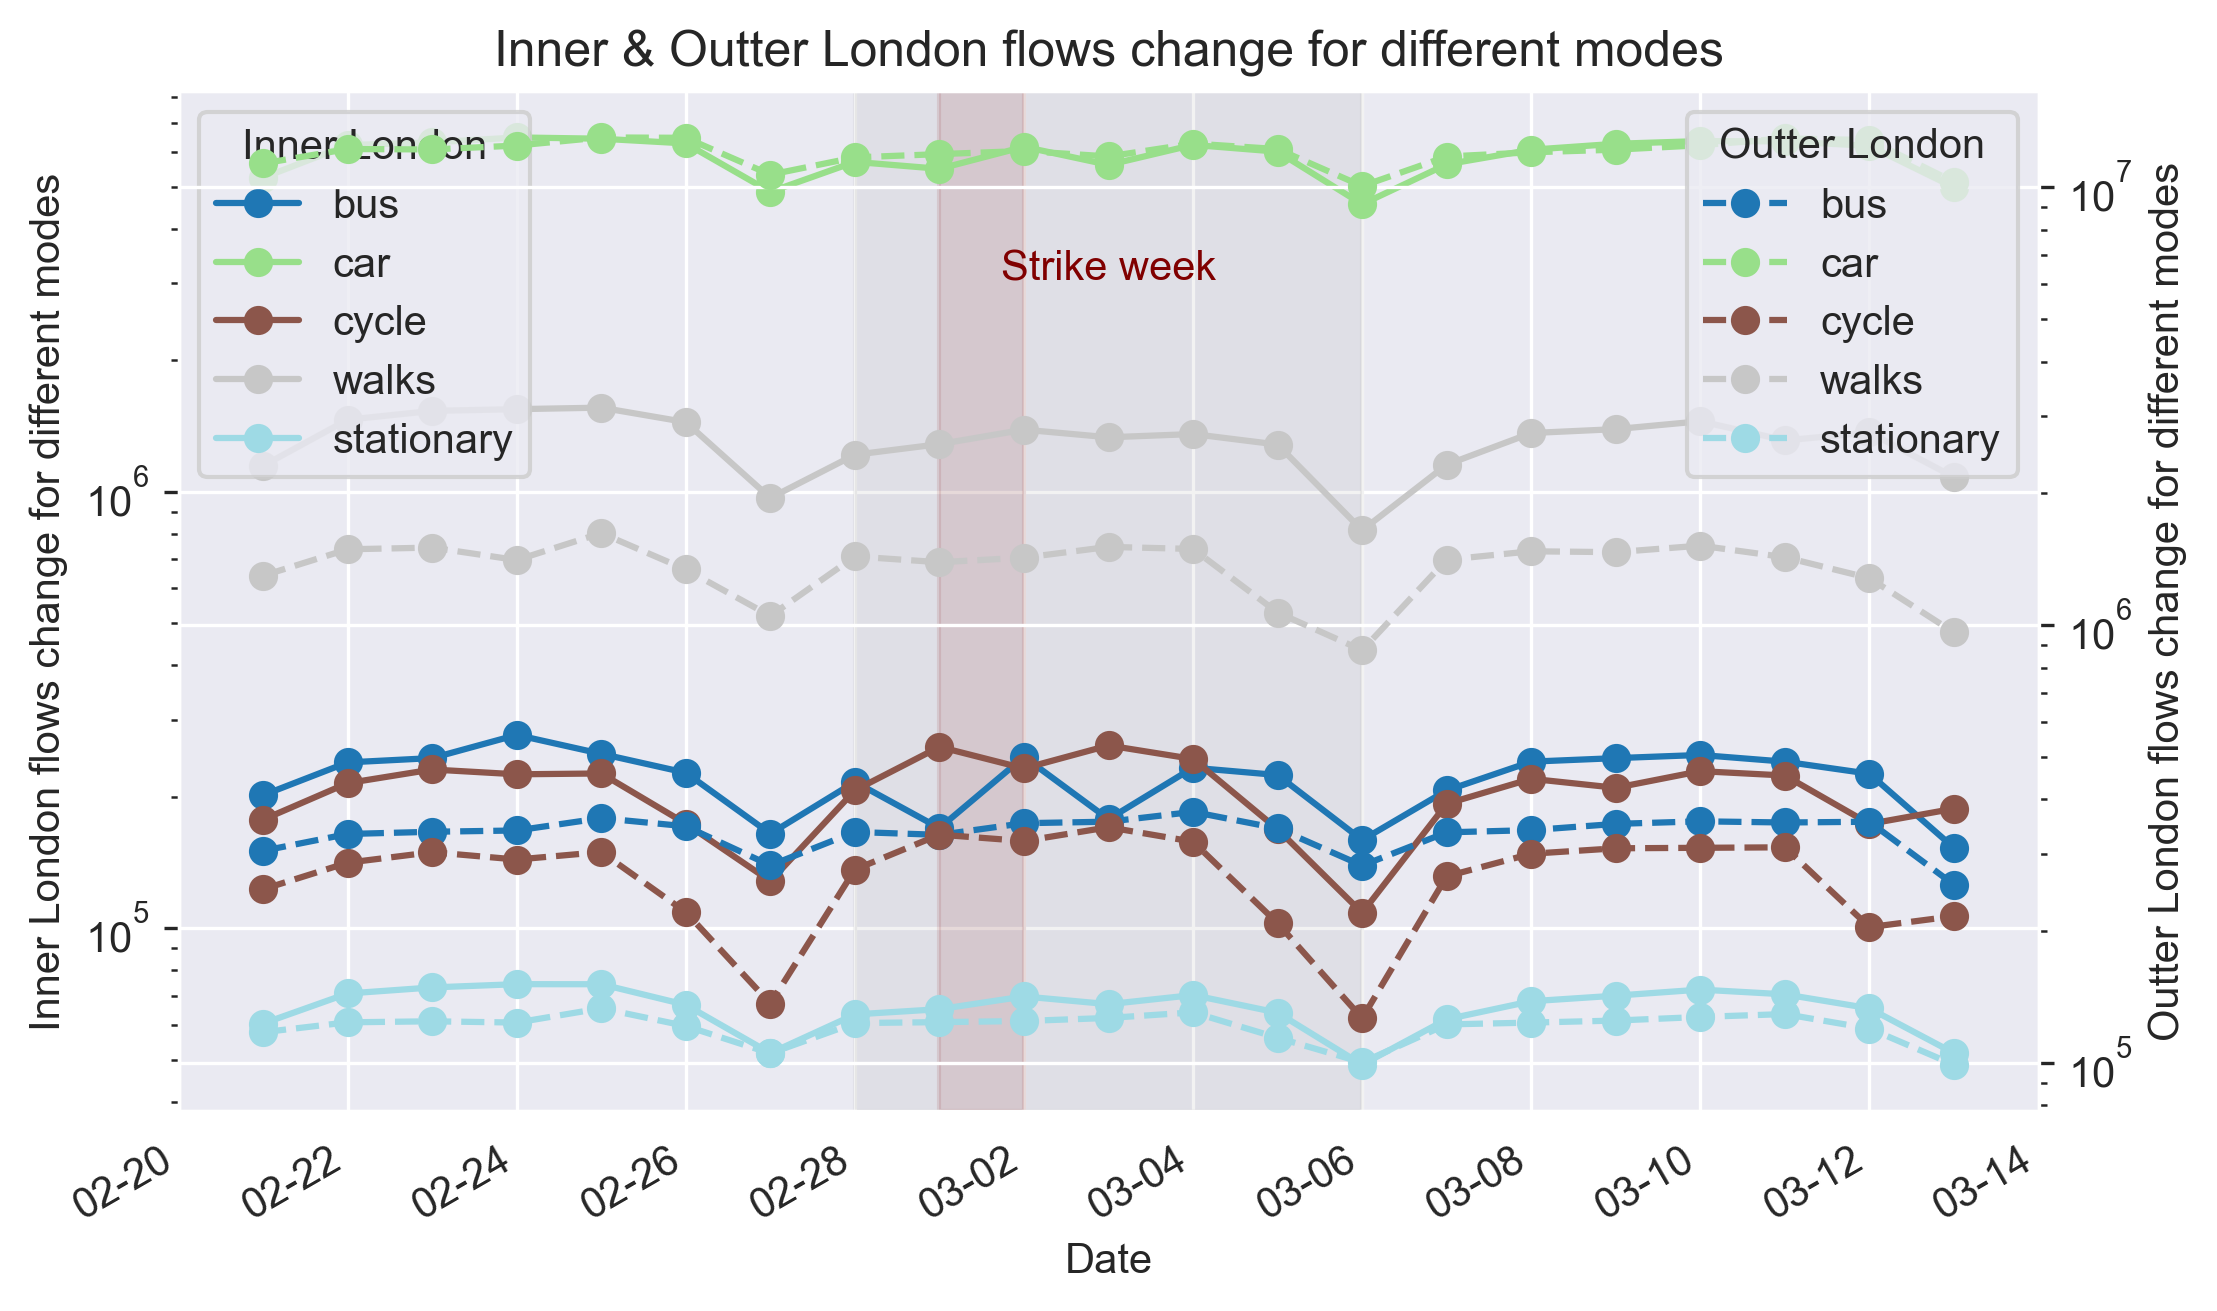

In [5]:
# visualize the inner and outter London flow data
fig, ax1 = plt.subplots(figsize=(8, 5), dpi=300)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# Add a shaded region
start_date = datetime.datetime(2022, 2, 28)
end_date = datetime.datetime(2022, 3, 6)
strike_start = datetime.datetime(2022, 3, 1)
strike_end = datetime.datetime(2022, 3, 2)
ax1.axvspan(start_date, end_date, color='gray', alpha=0.1, edgecolor='none')
ax1.axvspan(strike_start, strike_end, color='maroon', alpha=0.1, edgecolor='none')
# Add text
text_x = start_date + (end_date - start_date) / 2  # Center of the shaded region
ax1.set_yscale('log')
ymax = flows_inner.max().max()
text_y = ymax / 2  # Middle of the y range
ax1.text(text_x, text_y, 'Strike week', horizontalalignment='center', verticalalignment='center', color='maroon')
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

cmap_o = cm.get_cmap('tab20', len(flows_inner.columns))

for i in range(len(flows_inner.columns)):
    ax1.plot(flows_inner.index, flows_inner.iloc[:, i], color=cmap_o(i), label=flows_inner.columns[i],
             linewidth=1.5, linestyle='-', marker='o')
for i in range(len(flows_outer.columns)):
    ax2.plot(flows_outer.index, flows_outer.iloc[:, i], color=cmap_o(i), label=flows_outer.columns[i],
             linewidth=1.5, linestyle='--', marker='o')

ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlabel('Date')
ax1.set_ylabel('Inner London flows change for different modes')
ax2.set_ylabel('Outter London flows change for different modes')
ax1.legend(loc='upper left', title='Inner London')
ax2.legend(loc='upper right', title='Outter London')
plt.title('Inner & Outter London flows change for different modes')
# rotate the x-axis ticks
fig.autofmt_xdate()
fig.savefig(
    '/Users/zonghe/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Zonghe Ma/Outout/pics/Inner & Outter London flows change for different modes',
    dpi=300, bbox_inches='tight')
plt.show()

# Employ the Time Series Analysis

## Main part for the time series processing

In [6]:
import sys

sys.setrecursionlimit(100000)  # Set the recursion limit to a higher value
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
from tqdm import tqdm
import subprocess
import sys
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [11]:

# Set the general dataframe for the time series analysis as df_temporal
df_temporal = flows_londonsum.copy()

# creat a list of the types of data, for the purpose of modelling and plotting
types = ['car',
         'bus', 'cycle', 'walks', 'stationary'
         ]

In [17]:
# The loop below is the main part for the time series analysis, including the ADF test, differencing, decomposition, and model fitting and evaluation

# split the data into train and test
train = df_temporal.iloc[:int(0.8 * (len(df_temporal)))]  # 80% of the data as train
test = df_temporal.iloc[int(0.8 * (len(df_temporal))):]  # 20% of the data as test

for i in tqdm(range(len(types))):
    print('{:-^60s}'.format('Time series analysis for {} of London'.format(types[i])))

    # check the stationarity of the time series using ADF test
    globals()['result_0_{}'.format(i + 1)] = adfuller(df_temporal[types[i]],
                                                      autolag='BIC')  # Use the BIC method to automatically select the lag due to the large scale of dataset
    # Use 'globals()' to create a variable in the global scope, so that it can be used in the next loop for visualization

    # print the results of the ADF test
    print('\nThe ADF test for original time series:')
    print('p-value: %f' % globals()['result_0_{}'.format(i + 1)][1])
    print('ADF Statistic: %f' % globals()['result_0_{}'.format(i + 1)][0])
    print('Critical Values:')
    for key, value in globals()['result_0_{}'.format(i + 1)][4].items():
        print('\t%s: %.3f' % (key, value))

    # Difference the time series
    globals()['diff_1_{}'.format(i + 1)] = df_temporal[types[i]].diff().dropna()

    # check the stationarity of the differenced time series using ADF test
    print('\nThe ADF test for differenced time series (Difference order 1):')
    globals()['result_1_{}'.format(i + 1)] = adfuller(globals()['diff_1_{}'.format(i + 1)])
    print('p-value: %f' % globals()['result_1_{}'.format(i + 1)][1])
    print('ADF Statistic: %f' % globals()['result_1_{}'.format(i + 1)][0])
    print('Critical Values:')
    for key, value in globals()['result_1_{}'.format(i + 1)][4].items():
        print('\t%s: %.3f' % (key, value))

    # # fit the ARIMA model # This code block is for the ARIMA model, but it was replaced by the SARIMA model
    # # the order of the model is (p, d, q), where p is the order of the AR term, d is the order of differencing, and q is the order of the MA term
    # model = ARIMA(df_temporal[types[i]], order=(1, 1, 1))
    # globals()['model_fit_{}'.format(i + 1)] = model.fit()
    # # output the summary of the model
    # print('Summary of the ARIMA model for {}:'.format(types[i]))
    # print(globals()['model_fit_{}'.format(i + 1)].summary())
    # # calculate the residuals
    # globals()['residuals_{}'.format(i + 1)] = pd.DataFrame(globals()['model_fit_{}'.format(i + 1)].resid)
    #
    # # forecast the time series in ARIMA model
    # globals()['forecast_{}'.format(i + 1)] = globals()['model_fit_{}'.format(i + 1)].forecast(steps=365)
    # print(globals()['forecast_{}'.format(i + 1)])

    print('\n{:-^60s}'.format('SARIMA Model'))

    # Find the best parameters for the SARIMA model using the grid search method

    # generate all different combinations of p, d, and q triplets
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))

    # generate all different combinations of seasonal p, d, and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 7) for x in pdq]

    # find the best parameters for the model
    best_bic = np.inf
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(df_temporal[types[i]],
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
                results = mod.fit()
                if results.bic < best_bic:
                    best_bic = results.bic
                    best_params = param
                    best_params_seasonal = param_seasonal
            except:
                continue

    # print the best parameters
    print('Best SARIMA parameters:', best_params, best_params_seasonal)
    globals()['best_bic_{}'.format(i + 1)] = best_bic
    globals()['best_params_{}'.format(i + 1)] = best_params
    globals()['best_params_seasonal_{}'.format(i + 1)] = best_params_seasonal

    # fit the SARIMA model using the best parameters

    # After comparing the forecast results of SARIMA between directly using the steps=365 and using the loop to predict the next single value based on the all previous values, the latter one is better
    # So the loop as a kind of improvement is used for forecasting

    train_data = list(train[types[i]])
    forcast = []
    for data in test[types[i]]:
        model = sm.tsa.statespace.SARIMAX(pd.DataFrame(train_data),
                                          order=best_params,
                                          seasonal_order=best_params_seasonal,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)
        globals()['model_fit_{}'.format(i + 1)] = model.fit()
        pre = globals()['model_fit_{}'.format(i + 1)].forecast()
        pre = pre.to_frame(name='value')
        pre = pre.reset_index()
        prediction = pre['value'][0]
        forcast.append(prediction)
        train_data.append(data)

    globals()['forecast_{}'.format(i + 1)] = forcast  # the forecast results of SARIMA model

    # output the SARIMA model summary
    print('Summary of the SARIMA model for {}:'.format(types[i]))
    print(globals()['model_fit_{}'.format(i + 1)].summary())

    # forecast the time series in SARIMA model
    index = pd.date_range(start='2023-01-01', periods=len(test), freq='D')
    globals()['forecast_{}'.format(i + 1)] = pd.DataFrame(globals()['forecast_{}'.format(i + 1)], columns=['value'],
                                                          index=index)
    print(globals()['forecast_{}'.format(i + 1)])

    # calculate the residuals to check the acceptability of the model
    globals()['residuals_{}'.format(i + 1)] = pd.DataFrame(globals()['model_fit_{}'.format(i + 1)].resid)

  0%|          | 0/5 [00:00<?, ?it/s]/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/si

-----------Time series analysis for car of London-----------

The ADF test for original time series:
p-value: 0.161376
ADF Statistic: -2.333549
Critical Values:
	1%: -4.138
	5%: -3.155
	10%: -2.714

The ADF test for differenced time series (Difference order 1):
p-value: 0.931737
ADF Statistic: -0.254266
Critical Values:
	1%: -4.223
	5%: -3.189
	10%: -2.730

------------------------SARIMA Model------------------------
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.72604D+01    |proj g|=  3.55318D-10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

      

/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._i

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.57657D+00    |proj g|=  2.51286D-01

At iterate    5    f=  3.44472D+00    |proj g|=  1.95533D-01

At iterate   10    f=  3.44056D+00    |proj g|=  1.92413D-02

At iterate   15    f=  3.44002D+00    |proj g|=  8.49705D-03

At iterate   20    f=  3.43978D+00    |proj g|=  4.58806D-02

At iterate   25    f=  3.43934D+00    |proj g|=  1.11688D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     49      1     0     0   

/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/statespac

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.26953D+00    |proj g|=  4.53207D-01

At iterate    5    f=  8.06881D+00    |proj g|=  2.20604D-01

At iterate   10    f=  8.04046D+00    |proj g|=  2.52921D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     17      1     0     0   9.700D-06   8.040D+00
  F =   8.0404556550430151     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._i


At iterate   10    f=  4.14437D+00    |proj g|=  2.98866D-01

At iterate   15    f=  4.14236D+00    |proj g|=  2.64938D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     37      1     0     0   3.047D-05   4.142D+00
  F =   4.1423594583612191     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42251D+01    |proj g|=  6.10922D-01

At iterate    5    f=  1.42226D+01    |proj g|=  8.19900D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._i


At iterate   25    f=  8.74329D+00    |proj g|=  5.34212D-02

At iterate   30    f=  8.74315D+00    |proj g|=  4.61666D-02

At iterate   35    f=  8.74304D+00    |proj g|=  9.63355D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     56      1     0     0   1.932D-04   8.743D+00
  F =   8.7430447293751374     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.26243D+00    |proj g|=  1.24797D+00

At iter

/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/statespac


At iterate   10    f=  1.33438D+01    |proj g|=  5.92470D-01

At iterate   15    f=  1.32905D+01    |proj g|=  8.48111D+00

At iterate   20    f=  1.32789D+01    |proj g|=  4.41839D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     74      1     0     0   1.145D+00   1.328D+01
  F =   13.278221977585261     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.31361D+00    |proj g|=  1.73755D+00

At iter

/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/envs/geospatial/lib


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31    132      3     0     0   6.035D-02   8.061D+00
  F =   8.0609698631433311     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.41996D+00    |proj g|=  1.46758D-01

At iterate    5    f=  3.39733D+00    |proj g|=  4.49632D-03

At iterate   10    f=  3.39732D+00    |proj g|=  1.61578D-03

At iterate   15    f=  3.39727D+00    |proj g|=  3.72477D-04

At iter

/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/statespac

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.53095D+00    |proj g|=  8.35030D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   8.350D-06   7.531D+00
  F =   7.5309496239801801     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.4

/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/statespac


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      5      1     0     0   7.462D-07   7.193D+00
  F =   7.1926773817466483     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18305D+00    |proj g|=  3.94733D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/statespac

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47054D+00    |proj g|=  3.57057D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   3.571D-06   7.471D+00
  F =   7.4705424555321924     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.4

/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._i


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     19      1     0     0   2.833D-06   2.785D+00
  F =   2.7848806795675238     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.06021D+00    |proj g|=  1.60911D+00

At iterate    5    f=  7.70506D+00    |proj g|=  3.10270D-01

At iterate   10    f=  7.61141D+00    |proj g|=  3.34061D-02

At iterate   15    f=  7.59291D+00    |proj g|=  4.72601D-02

At iter

/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/stats


At iterate   25    f=  3.28735D+00    |proj g|=  8.34652D-02

At iterate   30    f=  3.28639D+00    |proj g|=  2.59298D-02

At iterate   35    f=  3.28622D+00    |proj g|=  5.60661D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     67      1     0     0   3.324D-05   3.286D+00
  F =   3.2862235778807500     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86736D+00    |proj g|=  5.71940D-01

At iter

/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters


At iterate    5    f=  1.06960D+01    |proj g|=  4.28314D-01

At iterate   10    f=  1.06706D+01    |proj g|=  1.07297D+00

At iterate   15    f=  1.06702D+01    |proj g|=  6.03215D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     54      1     0     0   6.032D-04   1.067D+01
  F =   10.670221264879746     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.63347D+00    |proj g|=  3.82695D-01

At iter

/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWar


At iterate   10    f=  2.19608D+00    |proj g|=  1.08645D-02

At iterate   15    f=  2.19568D+00    |proj g|=  4.83516D-03

At iterate   20    f=  2.19548D+00    |proj g|=  9.26299D-03

At iterate   25    f=  2.19539D+00    |proj g|=  1.68788D-02

At iterate   30    f=  2.19538D+00    |proj g|=  2.69142D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     67      1     0     0   2.691D-03   2.195D+00
  F =   2.1953801935285702     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Best SARIMA parameters: (1, 1, 1) (0, 1, 1, 7)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2

 This problem is unconstrained.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be u

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.35638D+00    |proj g|=  1.72190D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     12      1     0     0   1.721D-04   8.356D+00
  F =   8.3563783069911324     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.5

/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/statespac

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18028D+01    |proj g|=  6.69864D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   6.699D-07   1.180D+01
  F =   11.802818816835559     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.4

/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/statespac


At iterate   15    f=  2.33116D+00    |proj g|=  1.03657D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     27      1     0     0   1.516D-06   2.331D+00
  F =   2.3311552992881368     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24022D+01    |proj g|=  9.41327D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be u

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.04317D+00    |proj g|=  1.06868D-01

At iterate    5    f=  2.96125D+00    |proj g|=  1.56879D-01

At iterate   10    f=  2.90772D+00    |proj g|=  7.96174D-02

At iterate   15    f=  2.88226D+00    |proj g|=  4.73446D-01

At iterate   20    f=  2.87639D+00    |proj g|=  4.24191D-01

At iterate   25    f=  2.87441D+00    |proj g|=  5.47755D-02

At iterate   30    f=  2.87436D+00    |proj g|=  3.48358D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates,

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.04317D+00    |proj g|=  1.06868D-01

At iterate    5    f=  2.97429D+00    |proj g|=  1.77067D-01

At iterate   10    f=  2.90590D+00    |proj g|=  1.98891D-01

At iterate   15    f=  2.88262D+00    |proj g|=  9.75496D-02

At iterate   20    f=  2.87959D+00    |proj g|=  2.65078D-01

At iterate   25    f=  2.87639D+00    |proj g|=  8.71894D-01

At iterate   30    f=  2.87391D+00    |proj g|=  5.48727D-01

At iterate   35    f=  2.87314D+00    |proj g|=  1.40503D-01

At iterate   40    f=  2.87312D+00    |proj g|=  2.33281D-03

At iterate   45    f=  2.87306D+00    |proj g|=  9.78006D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._i

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11987D+01    |proj g|=  5.25375D-02

At iterate    5    f=  1.11713D+01    |proj g|=  1.06035D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     15      1     0     0   1.272D-06   1.117D+01
  F =   11.171250315447040     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/statespac


At iterate   20    f=  2.28576D+00    |proj g|=  4.75986D-03

At iterate   25    f=  2.28564D+00    |proj g|=  4.22556D-03

At iterate   30    f=  2.28564D+00    |proj g|=  2.47125D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     53      1     0     0   1.204D-05   2.286D+00
  F =   2.2856389225830434     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Best SARIMA parameters: (1, 1, 1) (0, 1, 1, 7)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= 

/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/statespac

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.40994D+00    |proj g|=  7.65574D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   7.656D-06   4.410D+00
  F =   4.4099367863365515     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.9

/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/statespac


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     10      1     0     0   1.133D-05   8.473D+00
  F =   8.4731248744564844     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.18983D+00    |proj g|=  5.00768D-01

At iterate    5    f=  7.95185D+00    |proj g|=  6.54198D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, f


At iterate   20    f=  2.53700D+00    |proj g|=  9.77997D-03

At iterate   25    f=  2.53692D+00    |proj g|=  1.41543D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     47      1     0     0   1.257D-05   2.537D+00
  F =   2.5369219237719727     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.36650D+01    |proj g|=  2.06390D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/statespac


At iterate   15    f=  3.18295D+00    |proj g|=  1.31237D-01

At iterate   20    f=  3.15647D+00    |proj g|=  2.18016D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     46      1     0     0   5.011D-04   3.156D+00
  F =   3.1562949737600396     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.69386D+00    |proj g|=  2.91648D-01

At iterate    5    f=  8.64531D+00    |proj g|=  3.81150D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._i

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.25489D+00    |proj g|=  1.25472D-01

At iterate    5    f=  3.19728D+00    |proj g|=  1.74421D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     13      1     0     0   3.689D-07   3.197D+00
  F =   3.1972766673304456     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/statespac


At iterate   40    f=  2.50399D+00    |proj g|=  2.83755D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     95      1     0     0   2.838D+00   2.504D+00
  F =   2.5039866146965073     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Best SARIMA parameters: (1, 1, 1) (0, 1, 1, 7)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of functio

/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:1234: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/anaconda3/env

Summary of the SARIMA model for walks:
                                     SARIMAX Results                                     
Dep. Variable:                                 0   No. Observations:                   20
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 7)   Log Likelihood                 -39.575
Date:                           Wed, 21 Jun 2023   AIC                             87.150
Time:                                   18:46:10   BIC                             83.545
Sample:                                        0   HQIC                            79.903
                                            - 20                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -3.7901   2372.447     -0.002      0.999   -4653.700    4646.120
ma.L

/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, f

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.63279D+00    |proj g|=  1.75849D+00

At iterate    5    f=  3.20028D+00    |proj g|=  1.66355D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     16      1     0     0   4.883D-05   3.200D+00
  F =   3.1999775347261212     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarnin


At iterate   10    f=  2.37892D+00    |proj g|=  6.38383D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     18      1     0     0   6.384D-06   2.379D+00
  F =   2.3789228703669831     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.66444D+00    |proj g|=  8.13605D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-pa

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.12748D+00    |proj g|=  4.61720D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   4.617D-06   6.127D+00
  F =   6.1274848660409287     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.8


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._i


At iterate    5    f=  6.69131D+00    |proj g|=  9.62848D-03

At iterate   10    f=  6.69002D+00    |proj g|=  2.93144D-03

At iterate   15    f=  6.69002D+00    |proj g|=  3.07208D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     23      1     0     0   3.072D-05   6.690D+00
  F =   6.6900220861923030     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.42148D+00    |proj g|=  4.74528D-01

At iter

/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/statespac

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.43151D+00    |proj g|=  5.35407D-01

At iterate    5    f=  6.22466D+00    |proj g|=  2.18293D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      7      1     0     0   2.183D-05   6.225D+00
  F =   6.2246578716777599     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, f


At iterate    5    f=  1.76178D+00    |proj g|=  4.04526D-02

At iterate   10    f=  1.75671D+00    |proj g|=  7.33710D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     17      1     0     0   4.618D-05   1.757D+00
  F =   1.7567119972127001     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.19760D+00    |proj g|=  2.79288D-02

At iterate    5    f=  6.19359D+00    |proj g|=  3.36938D-02

At iter

/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for var


At iterate    5    f=  9.79872D-01    |proj g|=  2.32192D-03

At iterate   10    f=  9.79846D-01    |proj g|=  1.63674D-03

At iterate   15    f=  9.79834D-01    |proj g|=  9.09716D-04

At iterate   20    f=  9.79832D-01    |proj g|=  2.39047D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     26      1     0     0   2.390D-05   9.798D-01
  F =  0.97983185375671733     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

In [25]:
# visualizations part
fig, ax = plt.subplots(12, len(types), figsize=(20, 17), dpi=500, constrained_layout=True)
for i in tqdm(range(12)):  # for each row of the figure
    for j in tqdm(range(len(types))):  # for each column of the figure as well as each type of time series
        # plot the decoposition of the time series and pick features
        decomposition = seasonal_decompose(df_temporal[types[j]], model='additive', period=7)
        trend = decomposition.trend
        seasonal = decomposition.seasonal
        residual = decomposition.resid
        if i == 0:  # plot the histogram and normal QQ plot of the time series
            sns.distplot(df_temporal[types[j]], hist=True, kde=True, bins=30, ax=ax[i, j], color='purple')
            ax[i, j].set_title(types[j])
            ax[i, j].legend(loc='upper left')
            # ax2 = ax[i, j].twinx()
            # stats.probplot(df_temporal[types[j]], plot=ax2)
            # ax2.set_ylabel('Normal QQ plot')
        elif i == 1:  # plot the trend and seasonality of the time series
            ax[i, j].plot(df_temporal[types[j]], linewidth=0.5, label='Original time series', color='purple')
            ax[i, j].set_title('Temporal features for {}'.format(types[j]))
            ax[i, j].legend(loc='upper left')
        elif i == 2:  # plot the trend of the original time series
            ax[i, j].plot(trend, label='Trend of original time series', color='purple')
            ax[i, j].xaxis.set_major_locator(mdates.AutoDateLocator())
            ax[i, j].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
            ax[i, j].legend(loc='upper left')
        elif i == 3:  # plot the seasonality of the original time series
            ax[i, j].plot(seasonal, label='Seasonality of original time series', linewidth=0.5, color='purple')
            ax[i, j].xaxis.set_major_locator(mdates.AutoDateLocator())
            ax[i, j].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
            ax[i, j].legend(loc='upper left')
        elif i == 4:  # plot the residuals of the original time series
            ax[i, j].plot(residual, label='Residuals of original time series', linewidth=0.5, color='purple')
            ax[i, j].xaxis.set_major_locator(mdates.AutoDateLocator())
            ax[i, j].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
            ax[i, j].legend(loc='upper left')
        elif i == 5:  # plot the differenced time series, order=1
            ax[i, j].plot(globals()['diff_1_{}'.format(j + 1)], linewidth=0.5, label='Differenced time series(order=1)',
                          color='purple')
            ax[i, j].legend(loc='upper left')
            ax[i, j].xaxis.set_major_locator(mdates.AutoDateLocator())
            ax[i, j].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
        elif i == 6:  # plot the ACF and PACF of the original time series, we can choose the parameters of the ARIMA and SARIMA model based on the ACF and PACF
            sample_size = len(globals()['diff_1_{}'.format(j + 1)])
            max_lags = sample_size // 2 - 1  # This will give 50% of sample size
            sm.graphics.tsa.plot_acf(globals()['diff_1_{}'.format(j + 1)], ax=ax[i, j], color='purple', lags=max_lags)
            ax[i, j].set_title('ACF of differenced time series(order=1)')
            # ax[i, j].set_label('ACF of differenced time series(order=1) for {}'.format(types[j]))
            ax[i, j].legend(loc='upper left')
        elif i == 7:
            sm.graphics.tsa.plot_pacf(globals()['diff_1_{}'.format(j + 1)], ax=ax[i, j], color='purple', lags=max_lags)
            ax[i, j].set_title('PACF of differenced time series(order=1)')
            # ax[i, j].set_label('PACF of differenced time series(order=1) for {}'.format(types[j]))
            ax[i, j].legend(loc='upper left')
        elif i == 8:  # plot the residuals of the SARIMA model to check the acceptability of the model
            ax[i, j].plot(globals()['residuals_{}'.format(j + 1)], linewidth=0.5, label='SARIMA Residuals',
                          color='purple')
            ax[i, j].legend(loc='upper left')
            ax[i, j].text(0.25, 0.1, 'Best parameters: {}{}'.format(globals()['best_params_{}'.format(j + 1)],
                                                                    globals()['best_params_seasonal_{}'.format(j + 1)]),
                          horizontalalignment='center', verticalalignment='center', transform=ax[i, j].transAxes)
        elif i == 9:  # plot the forecast of the SARIMA model
            ax[i, j].plot(df_temporal[types[j]], label='Observed', color='purple')
            # ax[i, j].set_xlim(pd.Timestamp('2019-01-01'), pd.Timestamp('2022-12-31'))
            # ax[i, j].set_xlim(pd.Timestamp('2022-12-31'), None)
            ax[i, j].plot(globals()['forecast_{}'.format(j + 1)], label='Forecast', color='orchid')
            ax[i, j].set_title('Forecast of {} by SARIMA'.format(types[j]))
            ax[i, j].legend(loc='upper left')
            ax[i, j].set_xlabel('Date')
            ax[i, j].set_ylabel('Value')

        # 2 figs below was not shown in the final output because they are not necessary, we can analyze the residuals of the SARIMA model to check the acceptability of the model
        elif i == 10:  # plot the ACF and PACF of the residuals of the SARIMA model
            sm.graphics.tsa.plot_acf(globals()['residuals_{}'.format(j + 1)], ax=ax[i, j], color='purple',
                                     lags=max_lags)
            ax[i, j].set_title('ACF of SARIMA residuals')
            # ax[i, j].set_label('ACF of residuals for {}'.format(types[j]))
            ax[i, j].legend(loc='upper left')

        elif i == 11:
            sm.graphics.tsa.plot_pacf(globals()['residuals_{}'.format(j + 1)], ax=ax[i, j], color='purple',
                                      lags=max_lags)
            ax[i, j].set_title('PACF of SARIMA residuals')
            # ax[i, j].set_label('PACF of residuals for {}'.format(types[j]))
            ax[i, j].legend(loc='upper left')
        else:
            continue

fig.suptitle('Time series analysis', fontsize=18)
plt.show()
fig.savefig(
    '/Users/zonghe/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Zonghe Ma/processed data/Time series analysis.png',
    dpi=300, bbox_inches='tight')

  0%|          | 0/5 [00:00<?, ?it/s]/var/folders/1k/27mkp8bj3ps60c3nmr7rbqzh0000gn/T/ipykernel_9881/3919838881.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_temporal[types[j]], hist=True, kde=True, bins=30, ax=ax[i, j], color='purple')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/1k/27mkp8bj3ps60c3nmr7rbqzh0000gn/T/ipykernel_9881/3919838881.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level functio